In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. EDA

In [416]:
df = pd.read_csv('kaggleton_5_data.csv')
df.head()

,Average Gender,Average Age,Average Income,Average Number of Friends Present,Beer Price Sensitivity,Frequency of Purchase,Time of Purchase,Social Activity Score,Dance Frequency Score,Brand Loyalty Score,Flirting Score,Aggression Score,Noise Generation Level
0,0,26,3,3,3,1,2,7,1,7,3,9,9
1,0,70,1,1,3,2,1,1,1,7,3,3,2
2,0,16,1,4,8,2,3,3,1,1,1,1,7
3,0,46,5,2,2,1,1,9,2,2,3,1,3
4,0,47,5,3,2,1,1,8,1,1,2,2,3


* Check NaN values

In [417]:
nan_values ={}

for feature in df.columns:
    nan_values[feature] = df[feature].isna().sum()
print(nan_values)

{'Average Gender': 0, 'Average Age': 0, 'Average Income': 0, 'Average Number of Friends Present': 0, 'Beer Price Sensitivity': 0, 'Frequency of Purchase': 0, 'Time of Purchase': 0, 'Social Activity Score': 0, 'Dance Frequency Score': 0, 'Brand Loyalty Score': 0, 'Flirting Score': 0, 'Aggression Score': 0, 'Noise Generation Level': 0}


* Major descriptive characteristics

In [418]:
df.describe()

,Average Gender,Average Age,Average Income,Average Number of Friends Present,Beer Price Sensitivity,Frequency of Purchase,Time of Purchase,Social Activity Score,Dance Frequency Score,Brand Loyalty Score,Flirting Score,Aggression Score,Noise Generation Level
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.120000,35.076000,2.880000,2.990000,3.690000,1.472000,2.020000,5.136000,2.104000,4.178000,2.030000,3.566000,4.684000
std,0.325287,15.900688,1.340595,1.512109,2.297925,0.499715,0.817886,3.163783,1.997289,3.075913,0.840543,2.833673,3.050698
min,0.000000,16.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,24.750000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,0.000000,29.000000,3.000000,3.000000,3.000000,1.000000,2.000000,7.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,0.000000,44.000000,3.000000,4.000000,5.000000,2.000000,3.000000,8.000000,2.000000,8.000000,3.000000,3.000000,7.000000
max,1.000000,79.000000,5.000000,5.000000,9.000000,2.000000,3.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000


* Pie graphs

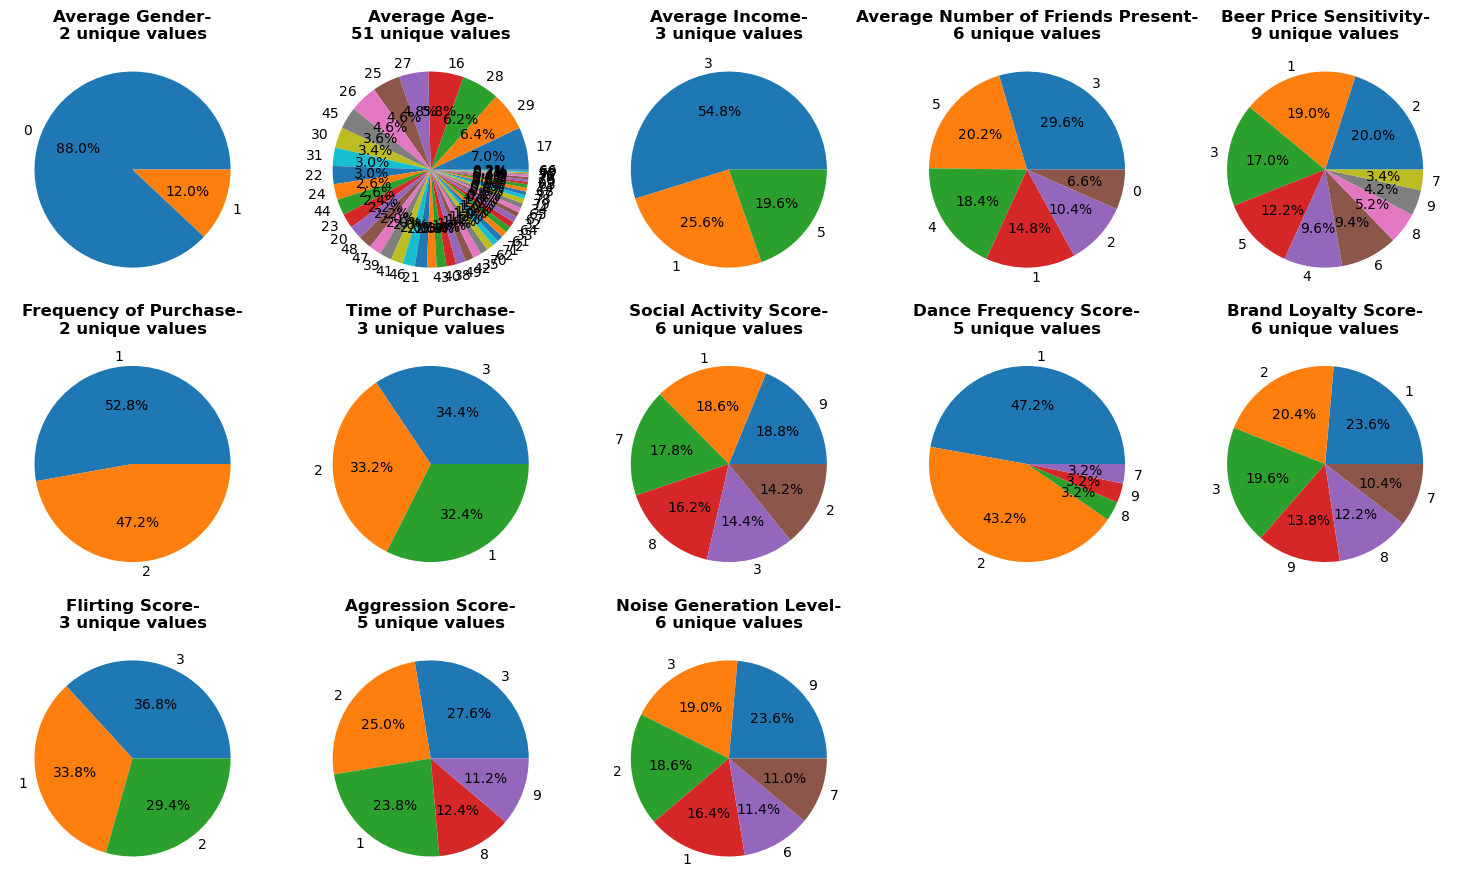

In [419]:
num_features = len(df.columns)
num_rows = (num_features + 4) // 5

fig, axis = plt.subplots(ncols=5, nrows=num_rows, figsize=(num_rows*5,num_rows*3))
axis = axis.flatten()

# build pie graph for each feature
for i, feature in enumerate(df.columns):
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axis[i])
    axis[i].set_title(f'{feature}-\n{df[feature].nunique()} unique values', fontweight='bold')
    axis[i].set_ylabel('')

# hide extra areas with empty graphs
for j in range(num_features, len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

* Distributions

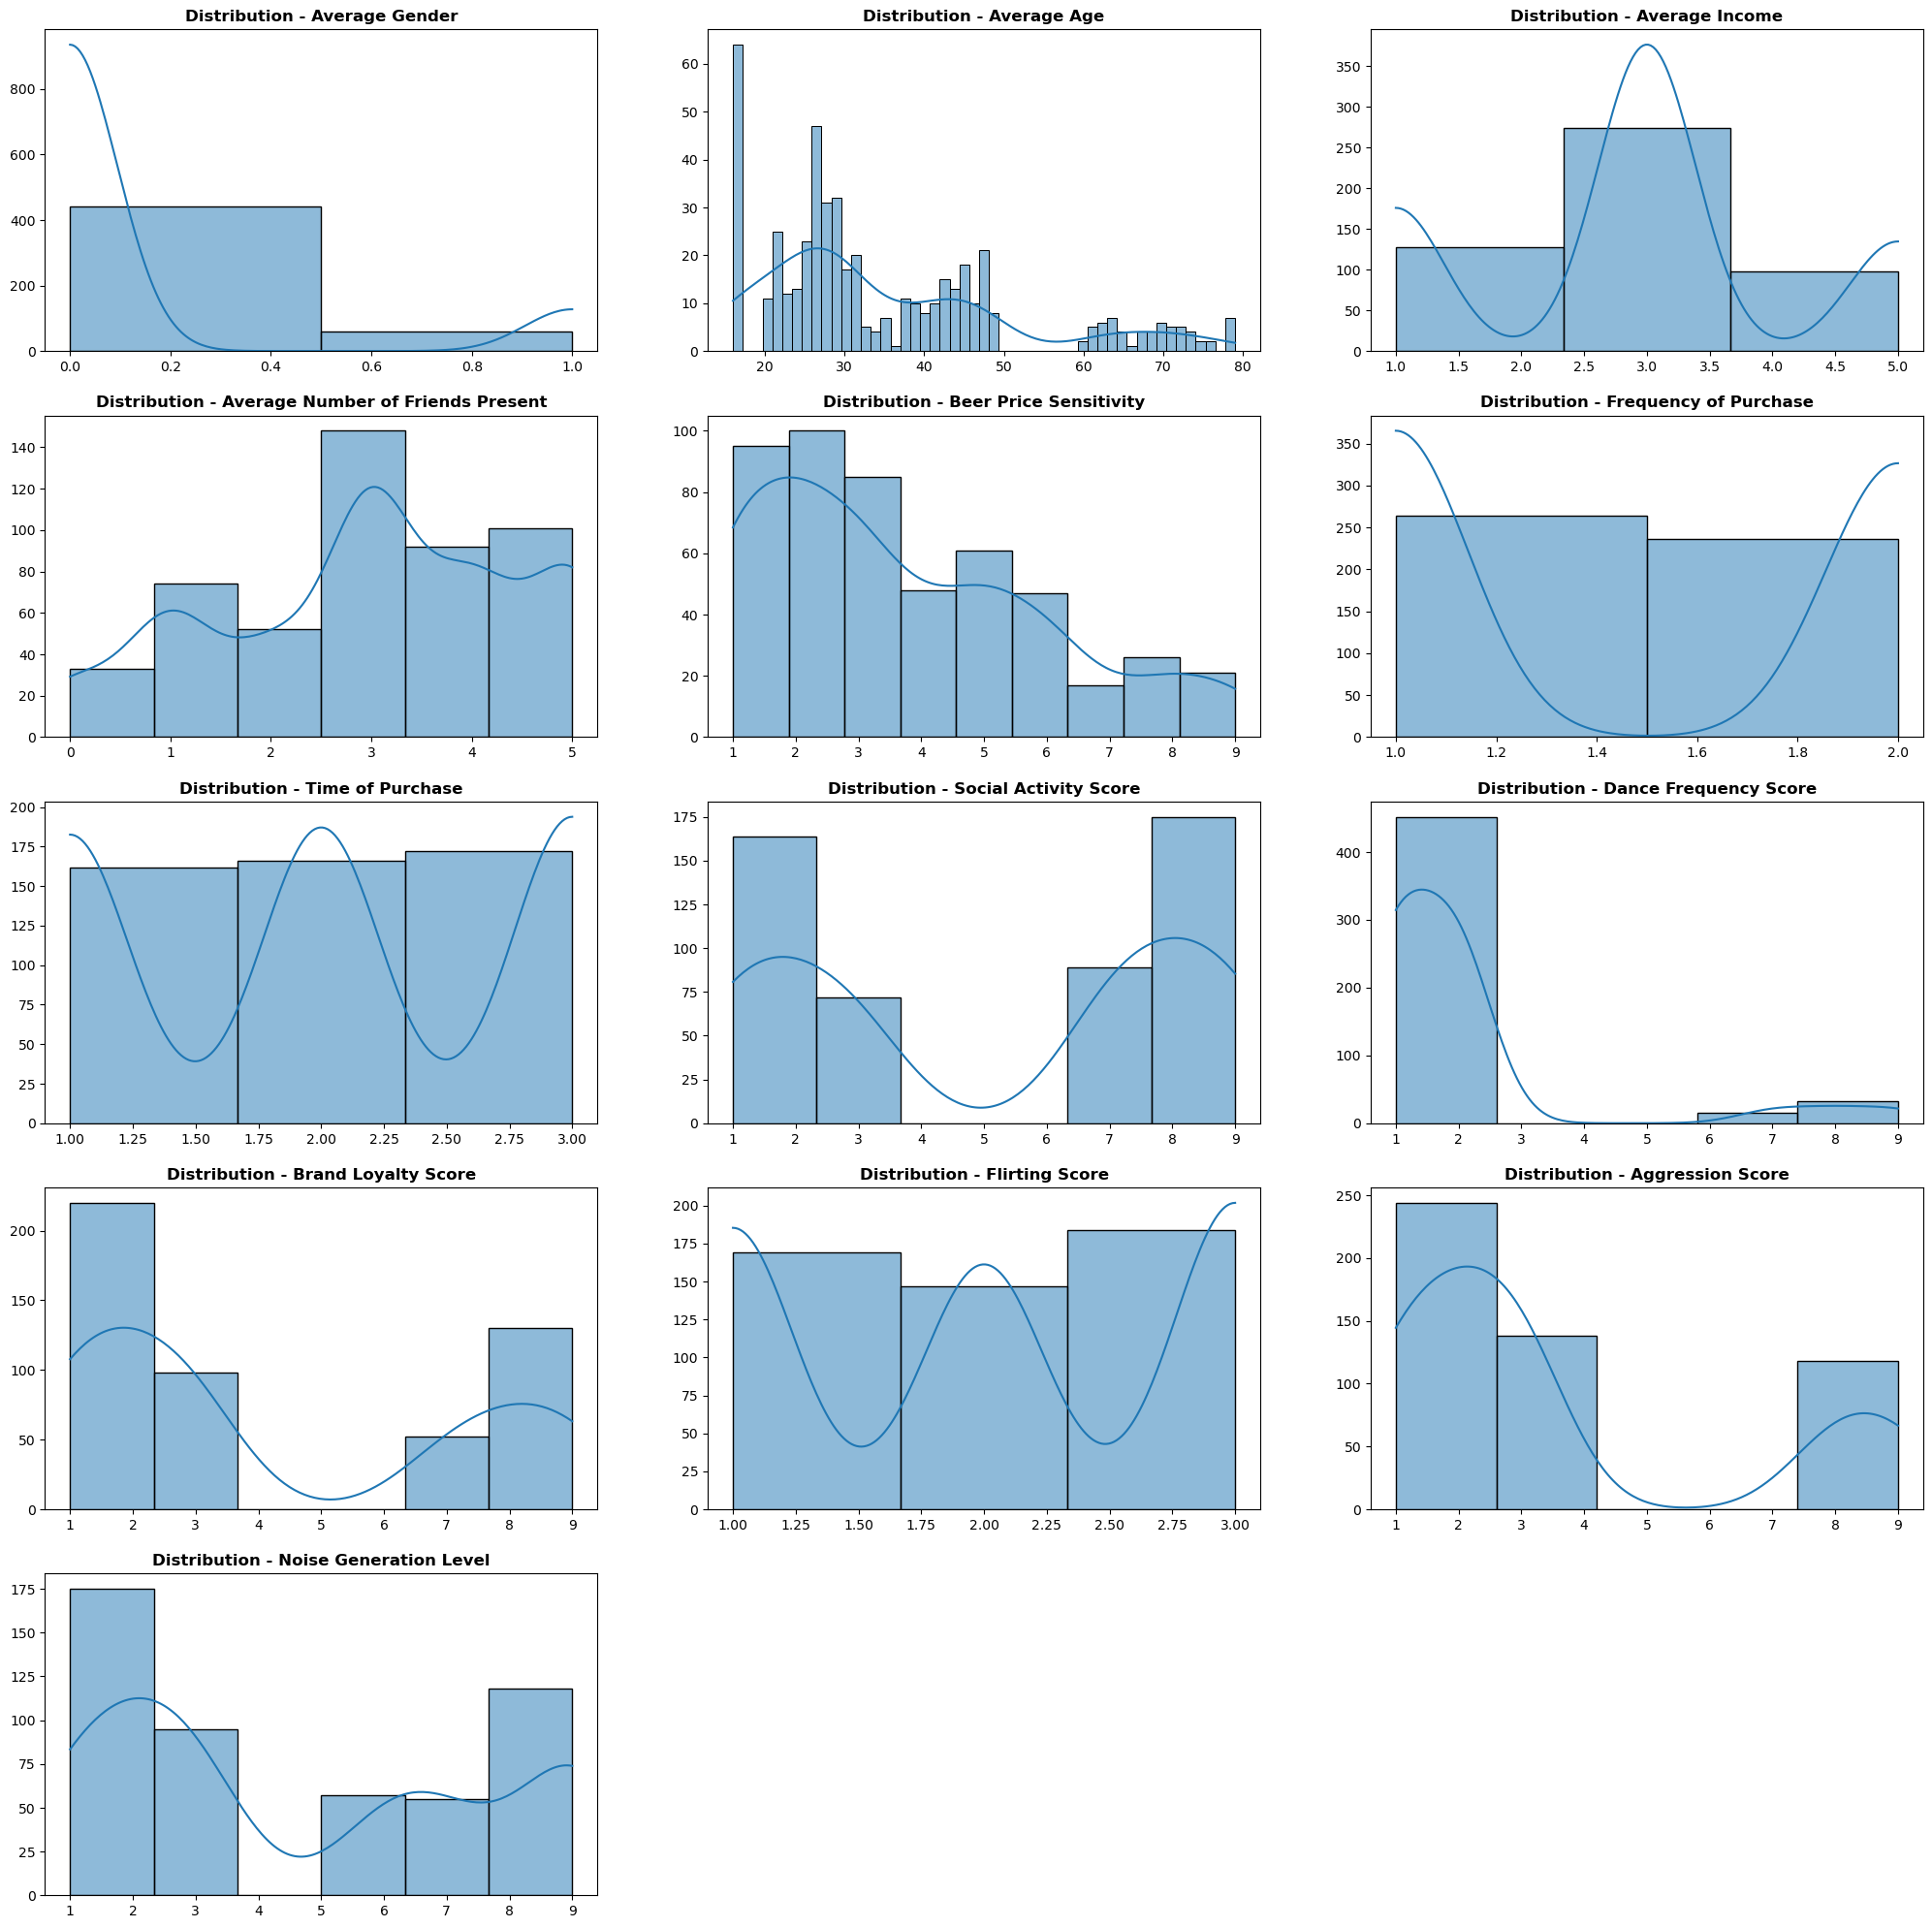

In [420]:
num_rows = (num_features + 2) // 3
fig, axis = plt.subplots(ncols=3, nrows=num_rows, figsize=(num_rows*5,num_rows*5))
axis = axis.flatten()

for i, feature in enumerate(df.columns):
    sns.histplot(df[feature], bins=df[feature].nunique(), kde=True, ax=axis[i])
    axis[i].set_title(f"Distribution - {feature}", fontweight='bold')
    axis[i].set_xlabel('')
    axis[i].set_ylabel('')

for j in range(num_features, len(axis)):
    fig.delaxes(axis[j])

plt.show()

* Correlation heatmap

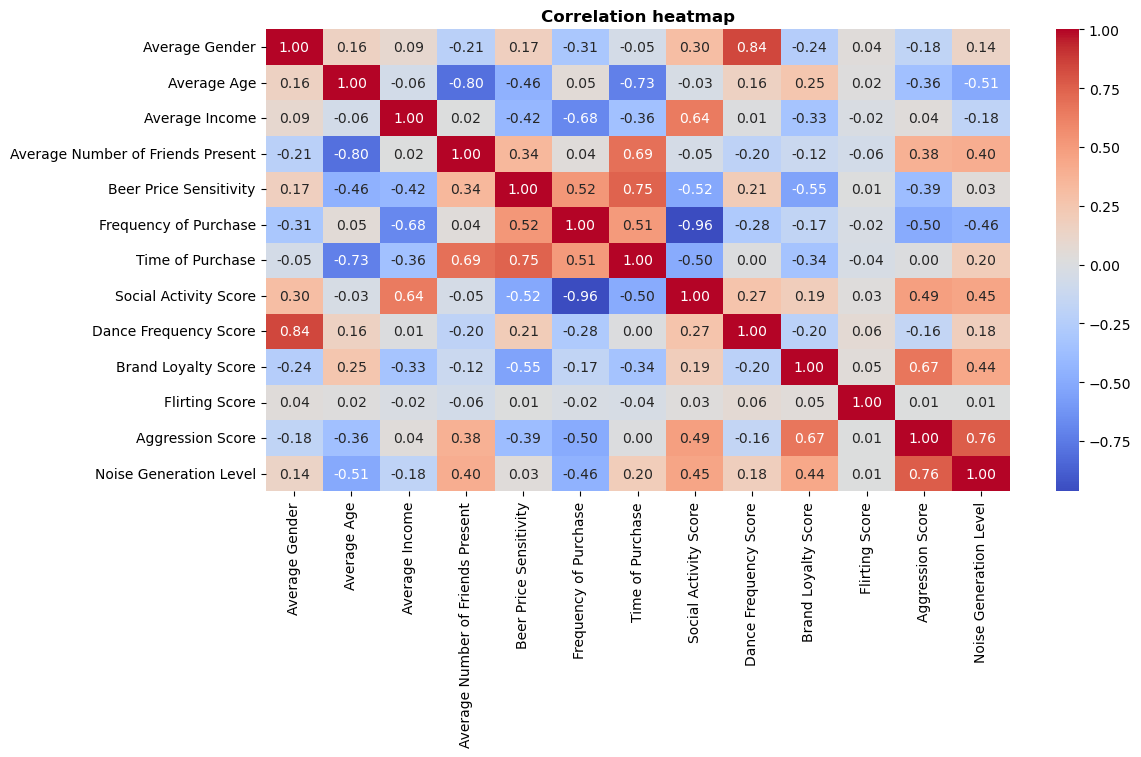

In [421]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation heatmap', fontweight='bold')
plt.show()